In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
df=pd.read_csv('Advertising.csv')

In [240]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [241]:
x=df.drop('sales',axis=1)

In [242]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [243]:
y=df['sales']

In [244]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [245]:
from sklearn.preprocessing import PolynomialFeatures

In [246]:
polynamial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [247]:
polynamial_converter.fit(x)

PolynomialFeatures(include_bias=False)

In [248]:
poly_features=polynamial_converter.transform(x)

In [249]:
poly_features.shape

(200, 9)

In [250]:
x.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [251]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
x_train,x_test,y_train,y_test=train_test_split(
    poly_features,y,test_size=0.3,random_state=101
    
)

In [254]:
from sklearn.linear_model import LinearRegression

In [255]:
model=LinearRegression()

In [256]:
model.fit(x_train,y_train)

LinearRegression()

In [257]:
test_prediction=model.predict(x_test)

In [258]:
test_prediction

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [259]:
from sklearn.metrics import mean_squared_error

In [260]:
np.sqrt(mean_squared_error(y_test,test_prediction))

0.6646431757269152

In [261]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

# Choosing Degree of Polynomial

In [262]:
# Create a different order poly
# split poly feat train/test
# store/save the rsme for Both train and test
# plot the result (error vs poly order)

In [263]:
train_rsme_errors=[]
test_rsme_errors=[]

for d in range(1,10):
    polynamial_converter=PolynomialFeatures(degree=d,include_bias=False,)

    poly_features=polynamial_converter.fit_transform(x)

    x_train,x_test,y_train,y_test=train_test_split(
    poly_features,y,test_size=0.3,random_state=101
    
    )
    model=LinearRegression()
    model.fit(x_train,y_train)

    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)

    train_rsme=np.sqrt(mean_squared_error(y_train,train_pred))

    test_rsme=np.sqrt(mean_squared_error(y_test,test_pred))

    train_rsme_errors.append(train_rsme)
    test_rsme_errors.append(test_rsme)




In [264]:
train_rsme_errors

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993467,
 0.25093429467703415,
 0.19712640340673274,
 5.421420423901486,
 0.14180399863580023,
 0.16654350003388188]

In [265]:
test_rsme_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742648623355,
 2.575831205082372,
 4.492668770849738,
 1381.4043738479102,
 4449.599764768951,
 95891.24543764145]

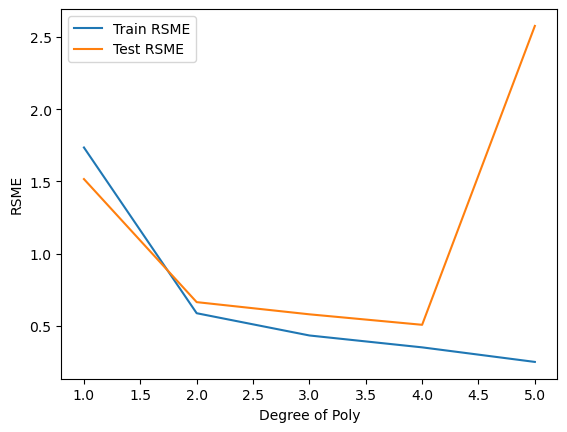

In [266]:
plt.plot(range(1,6),train_rsme_errors[:5],label='Train RSME')
plt.plot(range(1,6),test_rsme_errors[:5],label='Test RSME')
plt.ylabel("RSME")
plt.xlabel("Degree of Poly")

plt.legend()

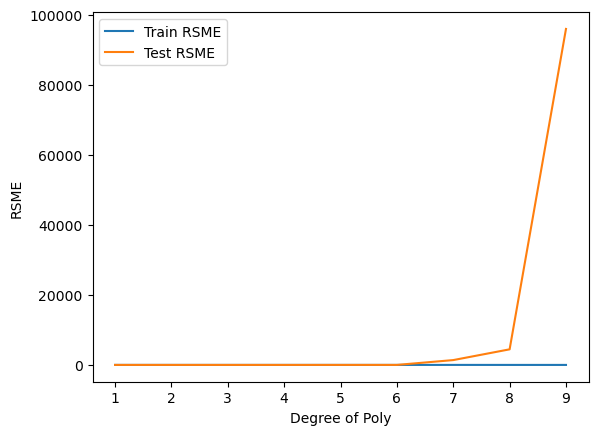

In [267]:
plt.plot(range(1,10),train_rsme_errors,label='Train RSME')
plt.plot(range(1,10),test_rsme_errors,label='Test RSME')
plt.ylabel("RSME")
plt.xlabel("Degree of Poly")

plt.legend()

In [268]:
final_converter=PolynomialFeatures(degree=3,include_bias=False)

In [269]:
final_model=LinearRegression()

In [270]:
final_converted_x=final_converter.fit_transform(x)
final_model.fit(full_converted_x,y)

LinearRegression()

In [271]:
from joblib import dump,load

In [272]:
dump(final_model,'final_poly_model.joblib')
dump(final_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [273]:
loaded_model=load('final_poly_model.joblib')
loaded_converter=load('final_poly_converter.joblib')

In [274]:
campaign=[[149,22,12]]

In [275]:
transform_data=loaded_converter.fit_transform(campaign)

In [276]:
loaded_model.predict(transform_data)

array([14.64501014])